In [66]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.axes_grid1 import host_subplot

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [67]:
#Importing and Merging 3 csv's data

df1 = pd.read_csv("Desktop\demand_factors.csv")
df2 = pd.read_csv("Desktop\supply_factors.csv")
df3 = pd.read_csv("Desktop\home_price.csv")
merged_df = pd.concat([df1, df2, df3], axis = 1, join = 'outer')
merged_df.head()

,year,interest_rate,no_of_house_loans_approved,no_of_immigrations,no_of_new_jobs_created,no_of_house_sold,no_of_house_for_sale,land_units_sold,construction_permits_approved,years,DATE,home_prices
0,2000,7.13,50,45,110,66,22,22,12,2000,1/1/2000,100.552
1,2000,7.13,55,46,119,67,23,24,12,2000,1/2/2000,101.339
2,2000,7.13,56,47,117,67,24,23,13,2000,1/3/2000,102.127
3,2000,7.13,56,48,117,56,23,21,14,2000,1/4/2000,102.922
4,2000,8.64,54,49,117,67,34,32,13,2000,1/5/2000,103.677


In [68]:
#Dropping extra columns with same data

merged_df.drop(columns=['years','DATE'], inplace=True)


In [69]:
#View of dataframe after dropping extra columns with same data
merged_df.head()

,year,interest_rate,no_of_house_loans_approved,no_of_immigrations,no_of_new_jobs_created,no_of_house_sold,no_of_house_for_sale,land_units_sold,construction_permits_approved,home_prices
0,2000,7.13,50,45,110,66,22,22,12,100.552
1,2000,7.13,55,46,119,67,23,24,12,101.339
2,2000,7.13,56,47,117,67,24,23,13,102.127
3,2000,7.13,56,48,117,56,23,21,14,102.922
4,2000,8.64,54,49,117,67,34,32,13,103.677


In [70]:
merged_df.shape

(252, 10)

In [71]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           252 non-null    int64  
 1   interest_rate                  230 non-null    float64
 2   no_of_house_loans_approved     252 non-null    int64  
 3   no_of_immigrations             252 non-null    int64  
 4   no_of_new_jobs_created         252 non-null    int64  
 5   no_of_house_sold               252 non-null    int64  
 6   no_of_house_for_sale           252 non-null    int64  
 7   land_units_sold                252 non-null    int64  
 8   construction_permits_approved  252 non-null    int64  
 9   home_prices                    252 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 19.8 KB


<AxesSubplot:>

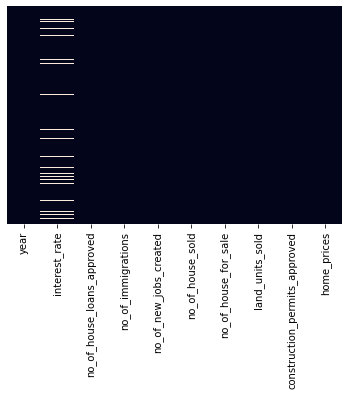

In [72]:
#Checking no. of missing values using heatmap

sns.heatmap(merged_df.isnull(),yticklabels=False,cbar=False)

In [73]:
## Filling Missing Values

merged_df['interest_rate']=merged_df['interest_rate'].fillna(merged_df['interest_rate'].mean())

In [74]:
#Checking no. of missing values after filling Missing Values

merged_df.isnull().sum()

year                             0
interest_rate                    0
no_of_house_loans_approved       0
no_of_immigrations               0
no_of_new_jobs_created           0
no_of_house_sold                 0
no_of_house_for_sale             0
land_units_sold                  0
construction_permits_approved    0
home_prices                      0
dtype: int64

<AxesSubplot:>

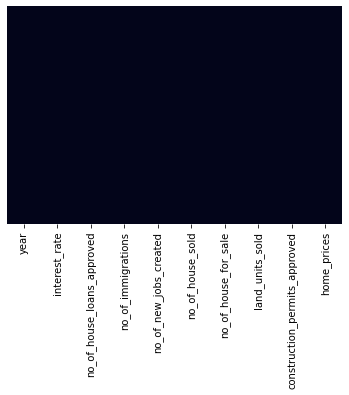

In [75]:
#Checking no. of missing values using heatmap

sns.heatmap(merged_df.isnull(),yticklabels=False,cbar=False)

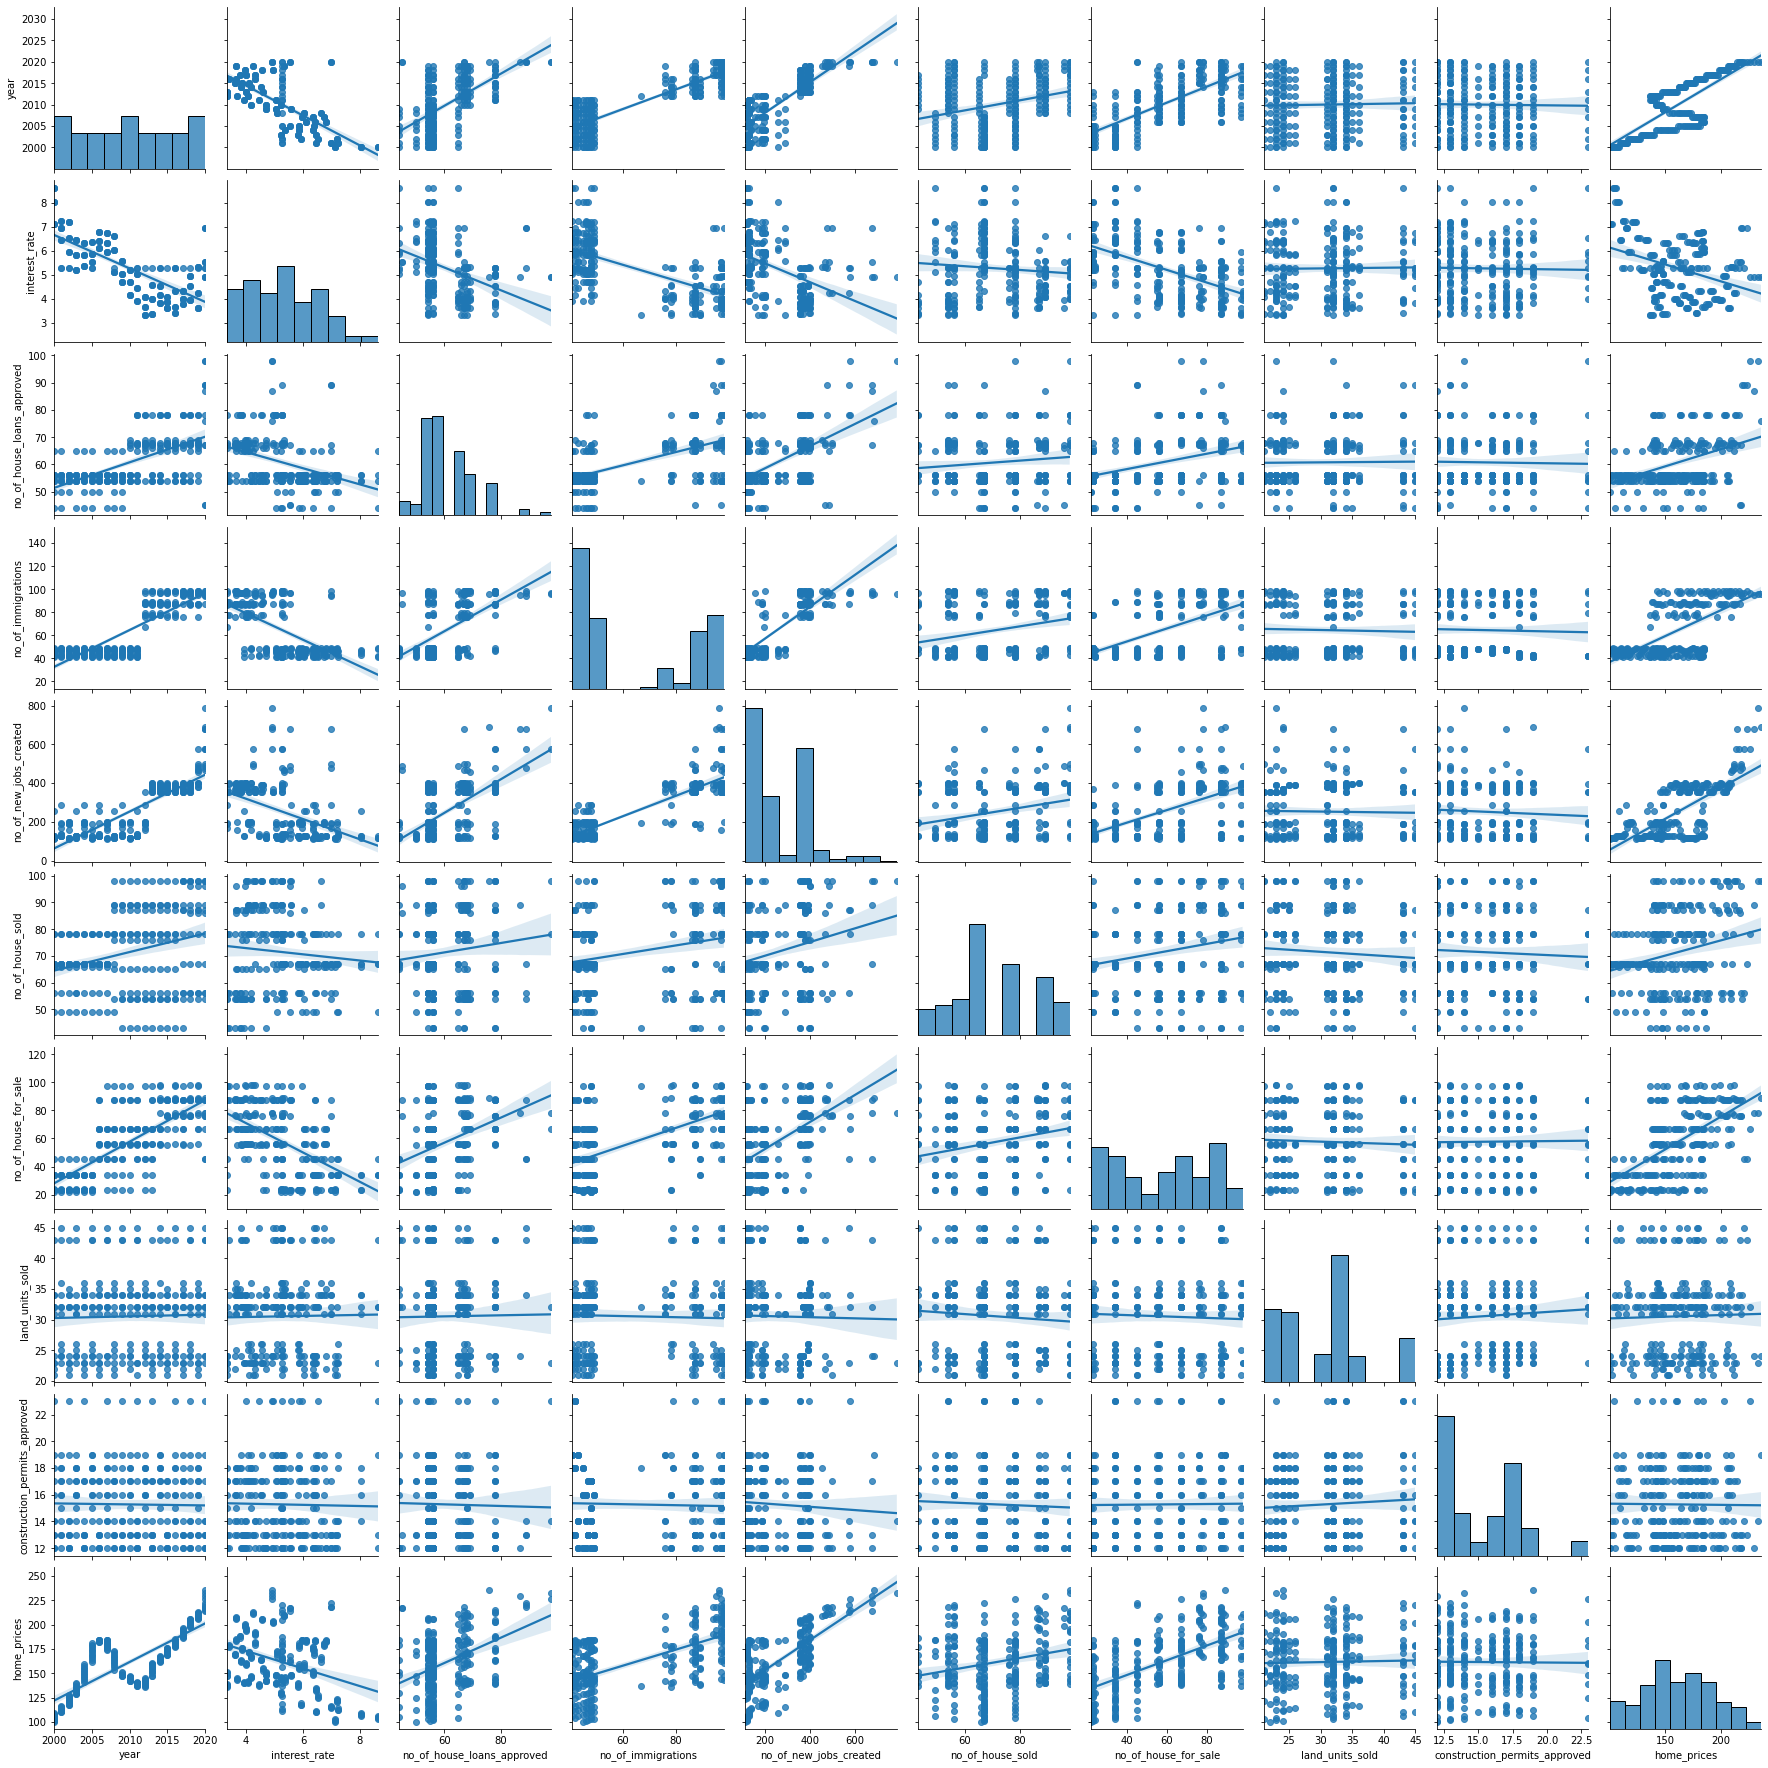

In [76]:
#Visualizing data to get idea about it in detail

g=sns.pairplot(merged_df, kind='reg')

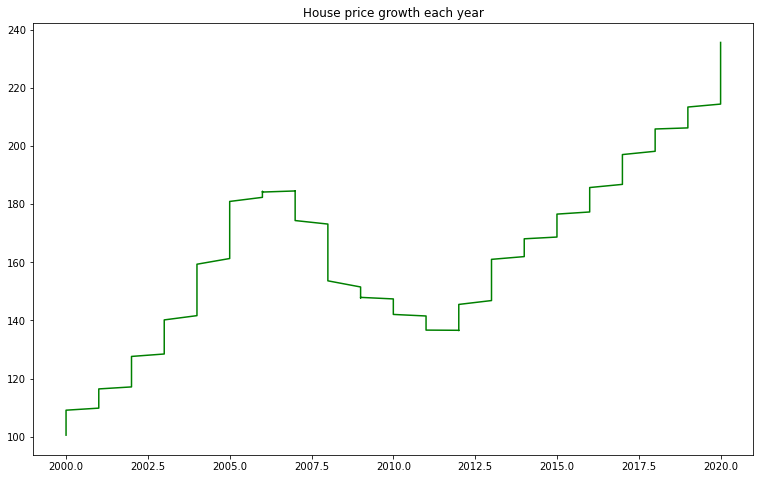

In [77]:
# Visualizing House price growth year by year

fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
ax.set_title('House price growth each year')
ax.plot(merged_df['year'],
       merged_df['home_prices'],
       color='green')
plt.show()

C:\Users\VAIBHAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of house loans approved each year as compared to increase in interest rate each year')

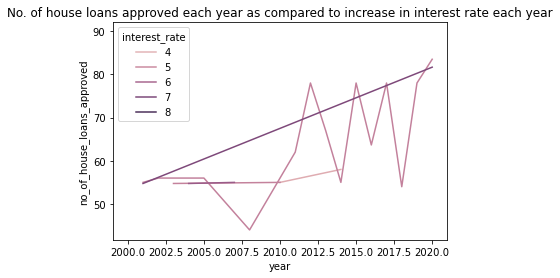

In [78]:
#No. of house loans approved each year as compared to increase in interest rate each year

sns.lineplot('year', 'no_of_house_loans_approved', ci=None, 
             hue='interest_rate', data=merged_df).set_title('No. of house loans approved each year as compared to increase in interest rate each year')


Text(0.5, 1.0, 'No. of house loans approved each year as compared to no. of house sold each year and impact it had on house prices each year')

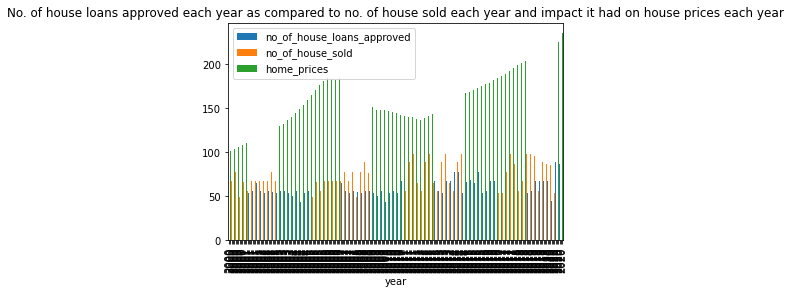

In [79]:
#Visualizing no. of house loans approved each year as compared to no. of house sold each year and impact it had on house prices each year


import matplotlib.pyplot as plt

merged_df.plot(x='year', y=['no_of_house_loans_approved','no_of_house_sold','home_prices'],kind="bar")
plt.title("No. of house loans approved each year as compared to no. of house sold each year and impact it had on house prices each year")


Text(0.5, 1.0, 'No. of immigrations in USA each year as compared to no. of new jobs created each year and impact it had on house prices each year')

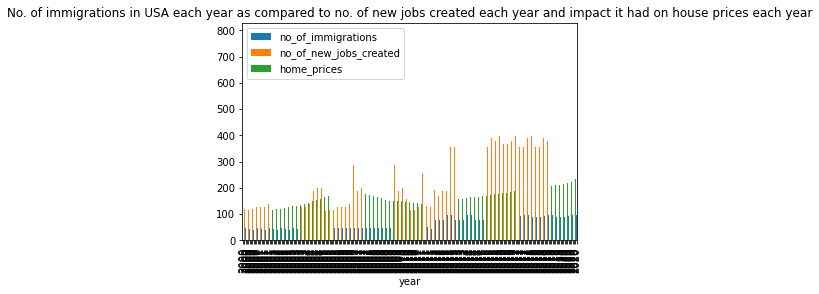

In [80]:
#Visualizing no. of immigrations in USA each year as compared to no. of new jobs created each year and impact it had on house prices each year

import matplotlib.pyplot as plt

merged_df.plot(x='year', y=['no_of_immigrations','no_of_new_jobs_created','home_prices'],kind="bar")
plt.title("No. of immigrations in USA each year as compared to no. of new jobs created each year and impact it had on house prices each year")

Text(0.5, 1.0, 'No. of construction permits approved each year as compared to no. of land units sold for construction each year and impact it had on house prices each year')

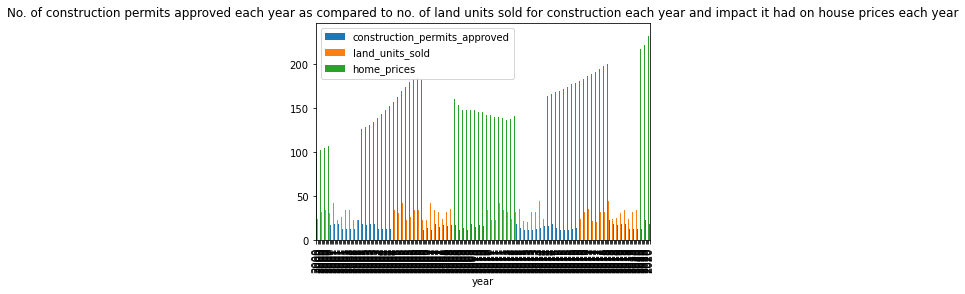

In [83]:
#Visualizing no. of construction permits approved each year as compared to no. of land units sold for construction each year and impact it had on house prices each year

import matplotlib.pyplot as plt

merged_df.plot(x='year', y=['construction_permits_approved','land_units_sold','home_prices'],kind="bar")
plt.title("No. of construction permits approved each year as compared to no. of land units sold for construction each year and impact it had on house prices each year")